# <u><b>Advanced Analysis For Stroke Prediction Dataset

In [1]:
# Data manipulation libraries
import pandas as pd 
import numpy as np 

# Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [32]:
data = pd.read_csv('D:/3rd Year - 2nd Semester/ST 3082 - Statistical Learning I/Data Analysis Final Project/Stroke Prediction/healthcare-dataset-stroke-data.csv')
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [33]:
data.drop(['id'],axis=1,inplace=True)
data['work_type'] = data['work_type'].replace('Self-employed', 'Self_employed')
data['smoking_status'] = data['smoking_status'].replace('formerly smoked', 'formerly_smoked')
data['smoking_status'] = data['smoking_status'].replace('never smoked', 'never_smoked')

In [34]:
#Removing the other from gender
data.drop(data[data['gender'] == 'Other'].index, inplace = True)
data["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder

DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = data[['age','gender','ever_married','Residence_type','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1}).astype(np.uint8)
X.Residence_type = X.Residence_type.replace({'Urban':0,'Rural':1}).astype(np.uint8)
X.ever_married = X.ever_married.replace({'No':0,'Yes':1}).astype(np.uint8)
Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender','ever_married','Residence_type']]),index=Missing.index)
data.loc[Missing.index,'bmi'] = predicted_bmi

In [36]:
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Urban,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,32.582353,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,1,0,0,1,0,0,0,1,0


In [7]:
# shuffling the dataset before model development
data = data.sample(frac = 1)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,Residence_type_Urban,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
3444,40.0,0,0,64.66,25.0,0,0,1,0,0,1,0,1,1,0,0
1825,48.0,0,0,84.56,41.8,0,0,1,0,1,0,0,0,0,1,0
4354,34.0,0,0,94.37,38.1,0,0,0,0,1,0,0,0,0,1,0
1822,25.0,0,0,81.54,43.1,0,0,0,0,1,0,0,0,0,0,0
2681,2.0,0,0,92.30,14.8,0,0,0,0,0,0,1,0,0,0,0


In [37]:
from sklearn.model_selection import train_test_split

np.random.seed(42)  # set the random seed for reproducibility

X = data.drop(['stroke'], axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
y_train.shape

(4087,)

### <u>Applying SMOTE

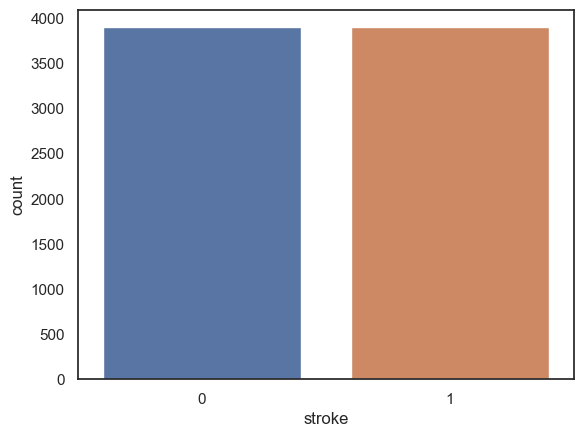

In [39]:
# Using SMOTE
from imblearn.over_sampling import SMOTE

sampler = SMOTE(random_state = 42)

X_train,y_train= sampler.fit_resample(X_train,y_train)
y_tr = pd.DataFrame({'stroke':y_train}) #y_tr is used just to draw graph
sns.countplot(data = y_tr, x = 'stroke', y= None)
plt.show()

In [40]:
###Libraries for Modedl Fitting

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

### Defining Functions to easily create Confusion matric and ROC curve for each model

In [41]:
### Function For ROC Curve
#Inputs are y_test and y_prob
#Make sure to calculate y_prob in each model before generating ROC curve

def plot_ROC(y_test, y_prob):
    from sklearn import metrics
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    sns.set_theme(style = 'white')
    plt.figure(figsize = (3, 3))
    plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [42]:
### Function For Confusion matrix

def plot_confusion_matrix(y_test, y_pred):
    acc = round(accuracy_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show(block=True)

## <u>Model Fitting

### <u> Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
logistic_model = LR.fit(X_train,y_train)
y_pred=logistic_model.predict(X_test)
class_report=classification_report(y_test,y_pred)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[838 122]
 [ 39  23]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       960
           1       0.16      0.37      0.22        62

    accuracy                           0.84      1022
   macro avg       0.56      0.62      0.57      1022
weighted avg       0.91      0.84      0.87      1022



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



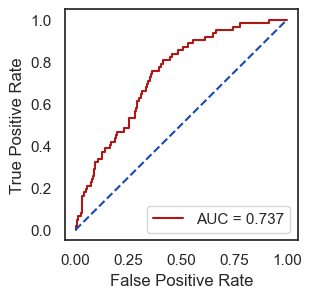

In [44]:
###Using the function that we defined above to create ROC 

y_prob = logistic_model.predict_proba(X_test)[:,1]
plot_ROC(y_test, y_prob)

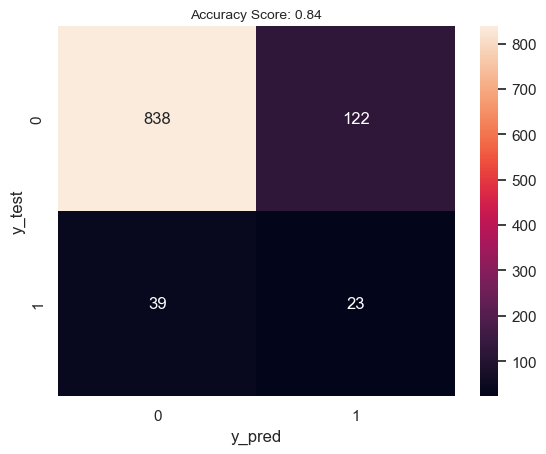

In [45]:
###Using the function that we defined above to create confusion matrix

plot_confusion_matrix(y_test, y_pred)

In [70]:
#Trying to check overfiitng by predicting training set

y_pred=logistic_model.predict(X_train)
class_report=classification_report(y_train,y_pred)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_train, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_train,y_pred))

=== Confusion Matrix ===
[[3382  518]
 [ 493 3407]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3900
           1       0.87      0.87      0.87      3900

    accuracy                           0.87      7800
   macro avg       0.87      0.87      0.87      7800
weighted avg       0.87      0.87      0.87      7800



## <u>KNeighborsClassifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier().fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
y_prob = knn_model.predict_proba(X_test)[:, 1]

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[779 181]
 [ 25  37]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       960
           1       0.17      0.60      0.26        62

    accuracy                           0.80      1022
   macro avg       0.57      0.70      0.57      1022
weighted avg       0.92      0.80      0.85      1022



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



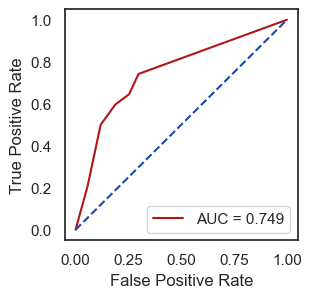

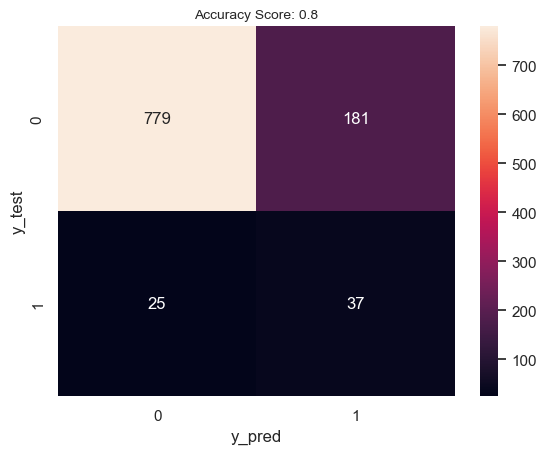

In [47]:
###Using the function that we defined above to create ROC and confusion matrix

y_prob = knn_model.predict_proba(X_test)[:,1]
plot_ROC(y_test, y_prob)
plot_confusion_matrix(y_test, y_pred)

In [72]:
#Trying to check overfiitng by predicting training set

y_pred=knn_model.predict(X_train)
class_report=classification_report(y_train,y_pred)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_train, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_train,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



=== Confusion Matrix ===
[[3332  568]
 [  40 3860]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.99      0.85      0.92      3900
           1       0.87      0.99      0.93      3900

    accuracy                           0.92      7800
   macro avg       0.93      0.92      0.92      7800
weighted avg       0.93      0.92      0.92      7800



## <u> SVM

In [48]:
svc = SVC(random_state = 42, probability = True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[689 271]
 [ 16  46]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       960
           1       0.15      0.74      0.24        62

    accuracy                           0.72      1022
   macro avg       0.56      0.73      0.54      1022
weighted avg       0.93      0.72      0.79      1022



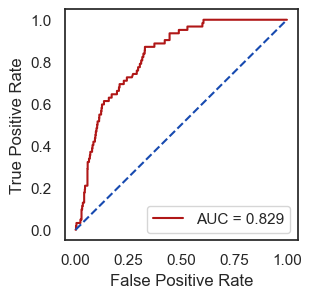

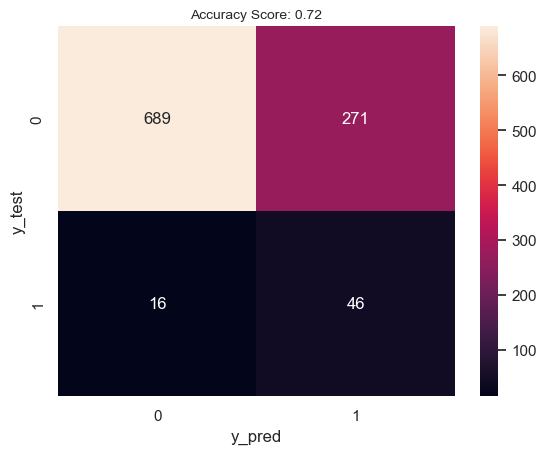

In [49]:
###Using the function that we defined above to create ROC and confusion matrix

y_prob = svc.predict_proba(X_test)[:,1]
plot_ROC(y_test, y_prob)
plot_confusion_matrix(y_test, y_pred)

## <u> Random Forest Classifier

In [55]:
rf = RandomForestClassifier(random_state = 42, max_depth = 5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[782 178]
 [ 26  36]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       960
           1       0.17      0.58      0.26        62

    accuracy                           0.80      1022
   macro avg       0.57      0.70      0.57      1022
weighted avg       0.92      0.80      0.85      1022



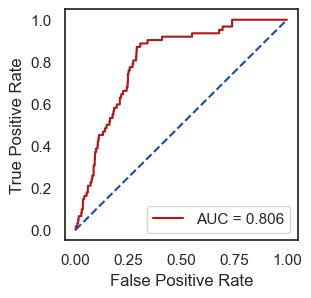

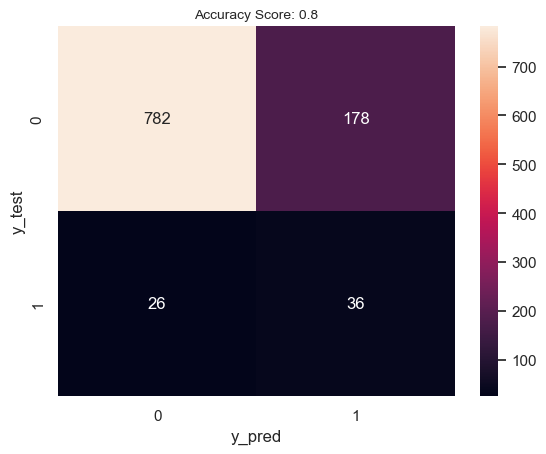

In [56]:
###Using the function that we defined above to create ROC and confusion matrix

y_prob = rf.predict_proba(X_test)[:,1]
plot_ROC(y_test, y_prob)
plot_confusion_matrix(y_test, y_pred)

In [57]:
# Feature importance
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(15))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train.columns.to_list()[i]
f_imp3['importance'] = rf.feature_importances_
f_imp3 = f_imp3.sort_values('importance', ascending = False)
f_imp3[0:12].style.background_gradient(cmap = 'Blues')

,feature,importance
0,age,0.425874
3,avg_glucose_level,0.110777
13,smoking_status_never_smoked,0.082496
4,bmi,0.079454
10,work_type_children,0.068556
8,work_type_Private,0.044521
14,smoking_status_smokes,0.041551
5,gender_Male,0.038083
11,Residence_type_Urban,0.033062
12,smoking_status_formerly_smoked,0.032186


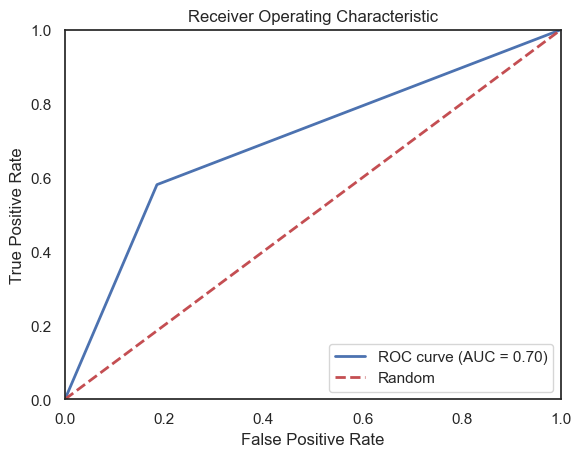

Best Threshold:  1


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Find best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)]
print("Best Threshold: ", best_threshold)

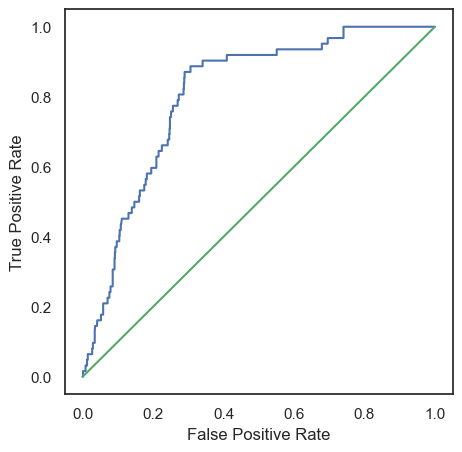

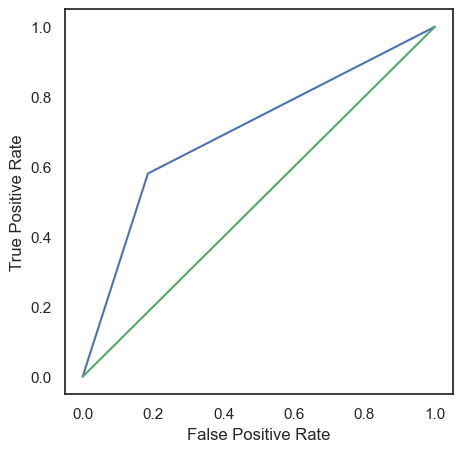

In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
def plot_sklearn_roc_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    roc_display.figure_.set_size_inches(5,5)
    plt.plot([0, 1], [0, 1], color = 'g')
# Plots the ROC curve using the sklearn methods - Good plot
plot_sklearn_roc_curve(y_test, y_prob)
# Plots the ROC curve using the sklearn methods - Bad plot
plot_sklearn_roc_curve(y_test, y_pred)

In [63]:
import pdpbox.pdp as pdp

ModuleNotFoundError: No module named 'pdpbox'

In [62]:


# Create a partial dependency plot
pdp_clstrl = pdp.pdp_isolate(rf, X_test, X_train.columns, feature='age')
pdp.pdp_plot(pdp_clstrl, 'age')
plt.ylabel("Change in prediction")
plt.show()

ModuleNotFoundError: No module named 'pdpbox'

In [53]:
from sklearn.model_selection import RandomizedSearchCV


# Define the parameter distributions for hyperparameter tuning
param_distributions = {
    'n_estimators': np.arange(10, 200, 10),  # Number of trees in the forest
    'max_depth': [None] + list(np.arange(5, 30, 5)),  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameter values
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)


Best Hyperparameters:  {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}


In [25]:
# Create a new instance of RandomForestClassifier with the best hyperparameter values
best_rf = RandomForestClassifier(random_state=42,
                                n_estimators=best_params['n_estimators'],
                                max_depth=best_params['max_depth'],
                                min_samples_split=best_params['min_samples_split'],
                                min_samples_leaf=best_params['min_samples_leaf'],
                                max_features=best_params['max_features'])

# Fit the best_rf to the training data
best_rf.fit(X_train, y_train)

# Predict with the best_rf
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:,1]

# Evaluate the performance of the tuned model
# Add your evaluation code here

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[910  47]
 [ 58   7]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       957
           1       0.13      0.11      0.12        65

    accuracy                           0.90      1022
   macro avg       0.53      0.53      0.53      1022
weighted avg       0.89      0.90      0.89      1022



In [26]:
# Feature importance
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(15))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train.columns.to_list()[i]
f_imp3['importance'] = best_rf.feature_importances_
f_imp3 = f_imp3.sort_values('importance', ascending = False)
f_imp3[0:12].style.background_gradient(cmap = 'Blues')

,feature,importance
0,age,0.360264
3,avg_glucose_level,0.177359
4,bmi,0.130147
13,smoking_status_never_smoked,0.061471
12,smoking_status_formerly_smoked,0.038619
8,work_type_Private,0.038433
14,smoking_status_smokes,0.033222
11,Residence_type_Urban,0.031494
9,work_type_Self_employed,0.030472
5,gender_Male,0.027748


## <u>XGBoost

In [64]:
xgb = XGBClassifier(random_state = 42, max_depth = 5, objective = 'binary:logistic', eval_metric = 'logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[915  45]
 [ 56   6]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       960
           1       0.12      0.10      0.11        62

    accuracy                           0.90      1022
   macro avg       0.53      0.52      0.53      1022
weighted avg       0.89      0.90      0.90      1022



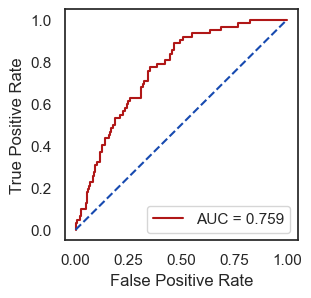

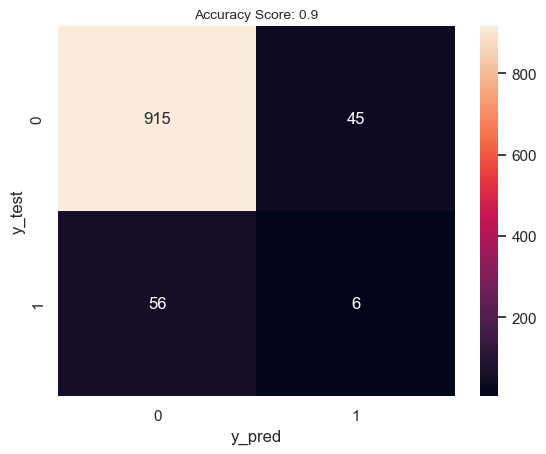

In [65]:
###Using the function that we defined above to create ROC and confusion matrix

y_prob =xgb.predict_proba(X_test)[:,1]
plot_ROC(y_test, y_prob)
plot_confusion_matrix(y_test, y_pred)

In [26]:
# Feature importance
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(15))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train.columns.to_list()[i]
f_imp3['importance'] = xgb.feature_importances_
f_imp3 = f_imp3.sort_values('importance', ascending = False)
f_imp3[0:12].style.background_gradient(cmap = 'Blues')

,feature,importance
14,smoking_status_smokes,0.173318
12,smoking_status_formerly_smoked,0.131784
13,smoking_status_never_smoked,0.126065
0,age,0.103055
9,work_type_Self_employed,0.093650
8,work_type_Private,0.075976
6,ever_married_Yes,0.059533
5,gender_Male,0.050586
2,heart_disease,0.046349
11,Residence_type_Urban,0.038521


In [27]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Define the parameter distribution for randomized search
param_dist = {
    'max_depth': np.arange(3, 7),  # Example values for max_depth
    'learning_rate': np.logspace(-3, 0, num=100),  # Example values for learning_rate
    'n_estimators': np.arange(100, 400, 50),  # Example values for n_estimators
    # Add more hyperparameters to tune as needed
}

# Initialize the XGBClassifier model
#xgb = XGBClassifier(random_state=42, objective='binary:logistic', eval_metric='logloss')

# Perform Randomized Search Cross Validation (RandomizedSearchCV) for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, cv=5,
                                   n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters from the RandomizedSearchCV
best_params = random_search.best_params_
print("Best Hyperparameters: ", best_params)

KeyboardInterrupt: 

In [31]:
# Train the XGBClassifier model with the best hyperparameters
best_xgb = XGBClassifier(random_state=42, objective='binary:logistic', eval_metric='logloss',
                         max_depth=best_params['max_depth'],
                         learning_rate=best_params['learning_rate'],
                         n_estimators=best_params['n_estimators'])
best_xgb.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate the performance of the tuned model
# Add your evaluation code here

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[919  38]
 [ 58   7]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       957
           1       0.16      0.11      0.13        65

    accuracy                           0.91      1022
   macro avg       0.55      0.53      0.54      1022
weighted avg       0.89      0.91      0.90      1022



In [32]:
# Feature importance
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(15))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train.columns.to_list()[i]
f_imp3['importance'] = best_xgb.feature_importances_
f_imp3 = f_imp3.sort_values('importance', ascending = False)
f_imp3[0:12].style.background_gradient(cmap = 'Blues')

,feature,importance
14,smoking_status_smokes,0.153267
12,smoking_status_formerly_smoked,0.152995
13,smoking_status_never_smoked,0.120062
10,work_type_children,0.090851
9,work_type_Self_employed,0.085252
0,age,0.074283
6,ever_married_Yes,0.072728
11,Residence_type_Urban,0.051877
8,work_type_Private,0.051666
5,gender_Male,0.050379


## <u> AdaBoost Classifier 

In [66]:
Ada = AdaBoostClassifier(n_estimators=2000, random_state = 42)
Ada.fit(X_train, y_train)
y_pred = Ada.predict(X_test)
y_prob = Ada.predict_proba(X_test)[:,1]

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[890  70]
 [ 51  11]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       960
           1       0.14      0.18      0.15        62

    accuracy                           0.88      1022
   macro avg       0.54      0.55      0.55      1022
weighted avg       0.90      0.88      0.89      1022



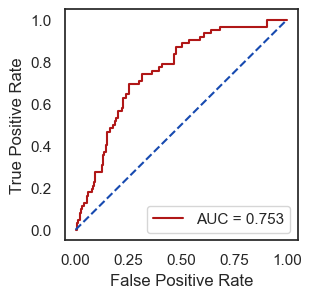

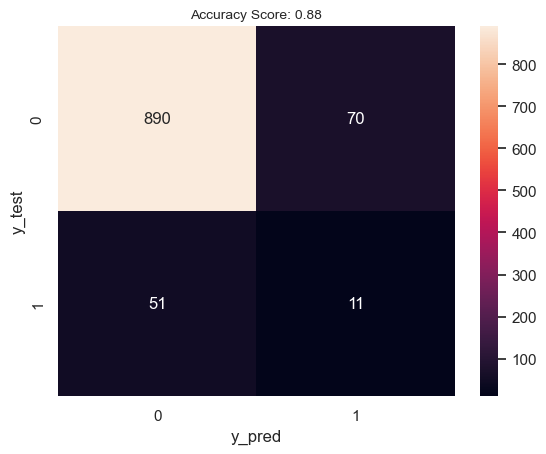

In [89]:
###Using the function that we defined above to create ROC and confusion matrix

y_prob =Ada.predict_proba(X_test)[:,1]
plot_ROC(y_test, y_prob)
plot_confusion_matrix(y_test, y_pred)

In [29]:
# Feature importance
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(15))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train.columns.to_list()[i]
f_imp3['importance'] = Ada.feature_importances_
f_imp3 = f_imp3.sort_values('importance', ascending = False)
f_imp3[0:12].style.background_gradient(cmap = 'Blues')

,feature,importance
0,age,0.752500
4,bmi,0.121500
3,avg_glucose_level,0.110500
10,work_type_children,0.003000
13,smoking_status_never_smoked,0.002500
6,ever_married_Yes,0.001500
8,work_type_Private,0.001500
12,smoking_status_formerly_smoked,0.001500
1,hypertension,0.001000
5,gender_Male,0.001000


## <u> CatBoost Classifier

In [67]:
cat = CatBoostClassifier(logging_level='Silent')
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
y_prob = cat.predict_proba(X_test)[:,1]

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

=== Confusion Matrix ===
[[908  52]
 [ 52  10]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.16      0.16      0.16        62

    accuracy                           0.90      1022
   macro avg       0.55      0.55      0.55      1022
weighted avg       0.90      0.90      0.90      1022



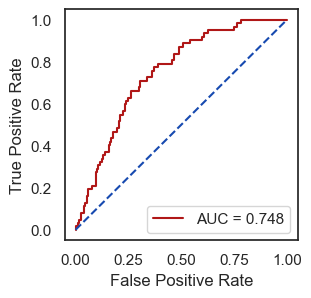

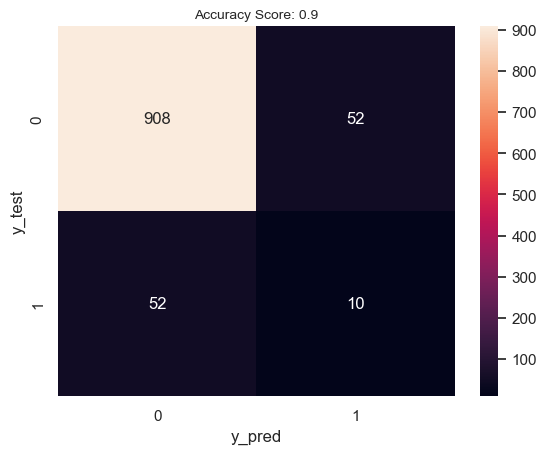

In [68]:
###Using the function that we defined above to create ROC and confusion matrix

y_prob =cat.predict_proba(X_test)[:,1]
plot_ROC(y_test, y_prob)
plot_confusion_matrix(y_test, y_pred)

In [31]:
# Feature importance
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(15))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train.columns.to_list()[i]
f_imp3['importance'] = cat.feature_importances_
f_imp3 = f_imp3.sort_values('importance', ascending = False)
f_imp3[0:12].style.background_gradient(cmap = 'Blues')

,feature,importance
0,age,33.094571
3,avg_glucose_level,17.662939
4,bmi,11.212998
13,smoking_status_never_smoked,7.647851
8,work_type_Private,5.400040
6,ever_married_Yes,4.742210
5,gender_Male,3.880508
14,smoking_status_smokes,3.812056
9,work_type_Self_employed,3.622199
12,smoking_status_formerly_smoked,3.372522


In [73]:
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

# Create an instance of CatBoostClassifier
cat = CatBoostClassifier(logging_level='Silent')

# Perform cross-validation and make predictions
y_pred = cross_val_predict(cat, X_train, y_train, cv=5)

# Compute predicted probabilities
y_prob = cat.predict_proba(X)[:, 1]

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("=== Confusion Matrix ===")
print(confusion_mat)
print('\n')

# Compute classification report
classification_rep = classification_report(y_test, y_pred)
print("=== Classification Report ===")
print(classification_rep)


CatBoostError: There is no trained model to use predict_proba(). Use fit() to train model. Then use this method.

### <u> Applying CV for each model

In [74]:
### Applying CV

import time
from sklearn.model_selection import cross_val_score

models = [RandomForestClassifier(), LogisticRegression(solver='liblinear'),XGBClassifier(random_state = 42, max_depth = 5, objective = 'binary:logistic', eval_metric = 'logloss'),AdaBoostClassifier(n_estimators=2000, random_state = 42)]
names = ["Random Forest", "Logistic Regression","XGB","AdaBoost"]
for model, name in zip(models, names):
    print(name)
    start = time.time()
    for score in ["accuracy", "precision", "recall"]:
        print(score," : ",cross_val_score(model, X_train, y_train ,scoring=score, cv=5).mean())
       
    print('Time elapsed: ',time.time() - start)
    print('\n')
     

Random Forest
accuracy  :  0.9546153846153846
precision  :  0.9491710258224068
recall  :  0.9600000000000002
Time elapsed:  8.722251892089844


Logistic Regression
accuracy  :  0.8651282051282052
precision  :  0.8632910384012525
recall  :  0.8671794871794871
Time elapsed:  0.554373025894165


XGB
accuracy  :  0.9524358974358975
precision  :  0.9464025530834931
recall  :  0.9594871794871797
Time elapsed:  6.621718645095825


AdaBoost
accuracy  :  0.9132051282051282
precision  :  0.9155170970167703
recall  :  0.9107692307692308
Time elapsed:  169.1020052433014




In [2]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

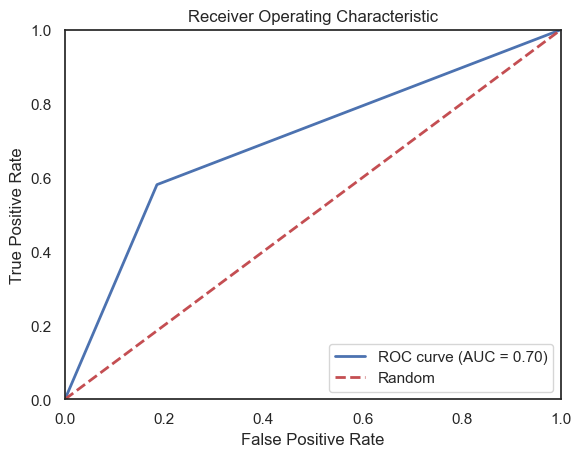

Best Threshold:  1


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Find best threshold
best_threshold = thresholds[np.argmax(tpr - fpr)]
print("Best Threshold: ", best_threshold)


In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier object
rfcv = RandomForestClassifier(n_estimators=10)

# Use cross-validation to fit the model
scores = cross_val_score(rfcv, X_train, y_train, cv=5)

# Print the mean accuracy score
print("Mean accuracy score:", scores.mean())



Mean accuracy score: 0.9488461538461539


In [79]:
y_pred = rfcv.predict(X_test)
y_prob = rfcv.predict_proba(X_test)[:,1]

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test,y_pred))

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.